# First Project: Impact of Weather on Crime in Austin

In [15]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from classes.weather import Weather
from classes.crime import Crime
from classes.database import Database

## Perform API Call - Austin Crime Data (data.austintexas.gov)

In [2]:
obj_crime = Crime()
json_crime = obj_crime.get_json_crime("2019-01-01T00:00:00", "2019-12-31T23:59:59")
df_crime = obj_crime.get_df_crime(json_crime)
df_crime

** Got OK response **


,Reported Timestamp,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
0,2019-01-01T00:04:00.000,201910022,FAMILY DISTURBANCE,3400,N,2019-01-01T00:00:00.000,RESIDENCE / HOME,78744,NaN,NaN,1546322400
1,2019-01-01T00:05:00.000,201910033,DISTURBANCE - OTHER,3401,N,2019-01-01T00:00:00.000,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),78727,NaN,NaN,1546322400
2,2019-01-01T00:05:00.000,201910044,BURGLARY NON RESIDENCE,502,N,2019-01-01T00:00:00.000,SPECIALTY STORE (TV FUR ETC.),78744,220,Burglary,1546322400
3,2019-01-01T00:11:00.000,201910072,CRASH/FAIL STOP AND RENDER AID,3604,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78757,NaN,NaN,1546322400
4,2019-01-01T00:11:00.000,201910071,DWI,2100,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,NaN,NaN,1546322400
...,...,...,...,...,...,...,...,...,...,...,...
995,2019-01-04T18:13:00.000,20198000053,THEFT BY SHOPLIFTING,607,N,2018-12-11T00:00:00.000,GROCERY / SUPERMARKET,78723,23C,Theft,1546646400
996,2019-01-04T18:15:00.000,20195000486,DEBIT CARD ABUSE,1108,N,2018-12-31T00:00:00.000,BAR / NIGHT CLUB,78701,NaN,NaN,1546646400
997,2019-01-04T18:22:00.000,201941365,THEFT FROM PERSON,610,N,2019-01-04T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78752,23A,Theft,1546646400
998,2019-01-04T18:25:00.000,201941375,THEFT,600,N,2019-01-04T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,23H,Theft,1546646400


## Perform API Call - Weather Data (Dark Sky)

In [17]:
# Create a weather object
obj_weather = Weather()

# Remove duplicated dates
epochs = df_crime["Epoch"].drop_duplicates()

# Get set of dates to request from Dark Sky
first_day = dt.datetime.fromtimestamp(min(df_crime["Epoch"]))
last_day = dt.datetime.fromtimestamp(max(df_crime["Epoch"]))
num_days = (last_day - first_day).days
one_day = dt.timedelta(1)
timestamps = [int((first_day + (i + 1) * one_day).timestamp()) for i in range(num_days)]

# Get weather data
json_weather = [obj_weather.get_json_weather(timestamp) for timestamp in timestamps]
json_weather

** Got bad response from weather API with status code 403. **


KeyError: 'hourly'

## Merge Data Sources (Crime and Weather Data)

In [13]:
df_result = pd.merge(df_weather, df_crime, left_on="Date", right_on="Epoch", how="right")

## Clean Data 

In [14]:
# Sorting by incident number 
df_result.sort_values("Incident Number", inplace = True)

df_result

,Date,Apparent Temperature,Cloud Cover,Dew Point,Humidity,Description,Precipitation Intensity,Precipitation Probability,Preassure,Summary,...,Incident Number,Crime Type,Highest Offense Code,Family Violence,Occurred Date,Location Type,Zip Code,UCR Category,Category Description,Epoch
15,1546326000,41.89,0.0,41.89,1.00,clear-night,0.0000,0.00,1017.6,Clear,...,201910020,THEFT BY SHOPLIFTING,607,N,2019-01-01T00:00:00.000,CONVENIENCE STORE,78753,23C,Theft,1546326000
0,1546322400,41.13,0.0,41.13,1.00,clear-night,0.0000,0.00,1018.0,Clear,...,201910022,FAMILY DISTURBANCE,3400,N,2019-01-01T00:00:00.000,RESIDENCE / HOME,78744,NaN,NaN,1546322400
1,1546322400,41.13,0.0,41.13,1.00,clear-night,0.0000,0.00,1018.0,Clear,...,201910033,DISTURBANCE - OTHER,3401,N,2019-01-01T00:00:00.000,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),78727,NaN,NaN,1546322400
2,1546322400,41.13,0.0,41.13,1.00,clear-night,0.0000,0.00,1018.0,Clear,...,201910044,BURGLARY NON RESIDENCE,502,N,2019-01-01T00:00:00.000,SPECIALTY STORE (TV FUR ETC.),78744,220,Burglary,1546322400
4,1546322400,41.13,0.0,41.13,1.00,clear-night,0.0000,0.00,1018.0,Clear,...,201910071,DWI,2100,N,2019-01-01T00:00:00.000,STREETS / HWY / ROAD / ALLEY,78701,NaN,NaN,1546322400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1546459200,30.49,1.0,35.19,0.93,cloudy,0.0171,0.24,1019.8,Overcast,...,20198000071,THEFT,600,N,2018-12-03T00:00:00.000,RESIDENCE / HOME,78741,23H,Theft,1546459200
968,1546639200,64.24,0.0,32.39,0.30,clear-day,0.0000,0.00,1017.0,Clear,...,20198000072,BURGLARY OF VEHICLE,601,N,2018-12-14T00:00:00.000,PARKING LOTS / GARAGE,78759,23F,Theft,1546639200
971,1546639200,64.24,0.0,32.39,0.30,clear-day,0.0000,0.00,1017.0,Clear,...,20198000073,BURGLARY OF VEHICLE,601,N,2018-12-30T00:00:00.000,PARKING LOTS / GARAGE,78704,23F,Theft,1546639200
954,1546635600,64.47,0.0,32.31,0.30,clear-day,0.0000,0.00,1016.8,Clear,...,20198000095,THEFT,600,N,2019-01-03T00:00:00.000,DEPARTMENT / DISCOUNT STORE,78759,23H,Theft,1546635600


# Store in a database

In [15]:
# obj_database = Database()
# obj_database.df_save(df_result)

## Plotting Part 1 - Crime Type vs. Weather Variables 

#### Crime Type vs. Temperature

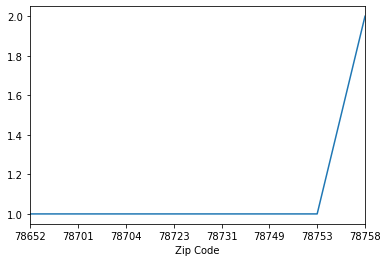

In [21]:
# Just an example
df_plot1 = df_result.groupby(["Zip Code"])["Incident Number"].count()
df_plot1.plot()

#### Crime Type vs. Atmospheric Pressure

#### Crime Type vs. Humidity

#### Crime Type vs. Moon Phase

## Plotting Part 2 - Crime Location Type vs. Weather Variables 

#### Crime Location Type vs. Temperature

#### Crime Location Type vs. Atmospheric Pressure

#### Crime Location Type vs. Humidity

#### Crime Location Type vs. Moon Phase 

## Written Analysis and Conclusions